In [50]:
import streamlit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
df=pd.read_csv("survey_results_public.csv")
df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [52]:
df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

In [53]:
df=df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedCompYearly"]]
df=df.rename({"ConvertedCompYearly": "Salary"}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,NaN,NaN,NaN,NaN,NaN
1,Canada,NaN,NaN,"Employed, full-time",NaN
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time",40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",215232.0
4,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,"Employed, full-time",NaN


In [54]:
df=df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time",40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",215232.0
8,Netherlands,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Employed, full-time",49056.0
10,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,"Employed, full-time",60307.0
11,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,"Employed, full-time;Independent contractor, fr...",194400.0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38071 entries, 2 to 73121
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       38071 non-null  object 
 1   EdLevel       38054 non-null  object 
 2   YearsCodePro  37935 non-null  object 
 3   Employment    38067 non-null  object 
 4   Salary        38071 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.7+ MB


In [56]:
df=df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [57]:
df=df[df["Employment"]=="Employed, full-time"]
df=df.drop("Employment", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31382 entries, 2 to 73121
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       31382 non-null  object 
 1   EdLevel       31382 non-null  object 
 2   YearsCodePro  31382 non-null  object 
 3   Salary        31382 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [58]:
df["Country"].value_counts()

United States of America                                7858
Germany                                                 2382
United Kingdom of Great Britain and Northern Ireland    2341
India                                                   1869
Canada                                                  1249
                                                        ... 
Haiti                                                      1
Zambia                                                     1
Suriname                                                   1
Somalia                                                    1
Seychelles                                                 1
Name: Country, Length: 155, dtype: int64

In [59]:
def shorten_countries(countries, cutoff):
    shorterned_countries={}
    for i in range(len(countries)):
        if countries[countries.index[i]]>=cutoff:
            shorterned_countries[countries.index[i]]=countries.index[i]
        else:
            shorterned_countries[countries.index[i]]="Other"
    return shorterned_countries

In [60]:
countries=shorten_countries(df.Country.value_counts(), 400)
print(countries)

{'United States of America': 'United States of America', 'Germany': 'Germany', 'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom of Great Britain and Northern Ireland', 'India': 'India', 'Canada': 'Canada', 'France': 'France', 'Brazil': 'Brazil', 'Spain': 'Spain', 'Netherlands': 'Netherlands', 'Australia': 'Australia', 'Italy': 'Italy', 'Poland': 'Poland', 'Sweden': 'Sweden', 'Russian Federation': 'Russian Federation', 'Switzerland': 'Switzerland', 'Turkey': 'Other', 'Israel': 'Other', 'Austria': 'Other', 'Norway': 'Other', 'Portugal': 'Other', 'Denmark': 'Other', 'Belgium': 'Other', 'Finland': 'Other', 'Mexico': 'Other', 'New Zealand': 'Other', 'Greece': 'Other', 'South Africa': 'Other', 'Pakistan': 'Other', 'Czech Republic': 'Other', 'Iran, Islamic Republic of...': 'Other', 'Argentina': 'Other', 'Romania': 'Other', 'Ireland': 'Other', 'Ukraine': 'Other', 'Hungary': 'Other', 'Japan': 'Other', 'Bangladesh': 'Other', 'Colombia': 'Other', 'China': 'Other', 'Bulgaria

In [61]:
df["Country"]=df["Country"].map(countries)
df.Country.value_counts()

Other                                                   8643
United States of America                                7858
Germany                                                 2382
United Kingdom of Great Britain and Northern Ireland    2341
India                                                   1869
Canada                                                  1249
France                                                  1126
Brazil                                                  1014
Spain                                                    858
Netherlands                                              701
Australia                                                700
Italy                                                    667
Poland                                                   572
Sweden                                                   561
Russian Federation                                       425
Switzerland                                              416
Name: Country, dtype: in

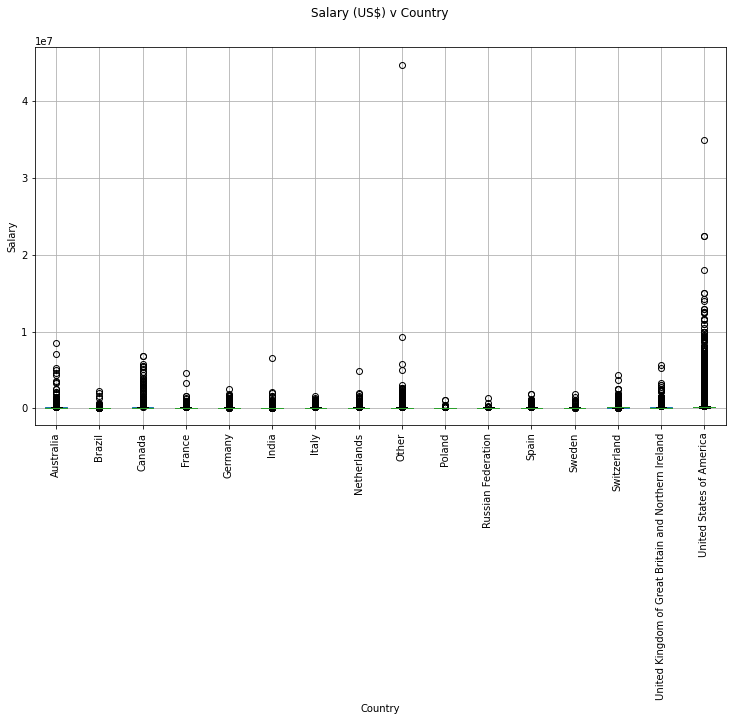

In [62]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [63]:
df=df[df["Salary"]<=25000]
df=df[df["Salary"]>=10000]
df=df[df["Country"]!="Other"]

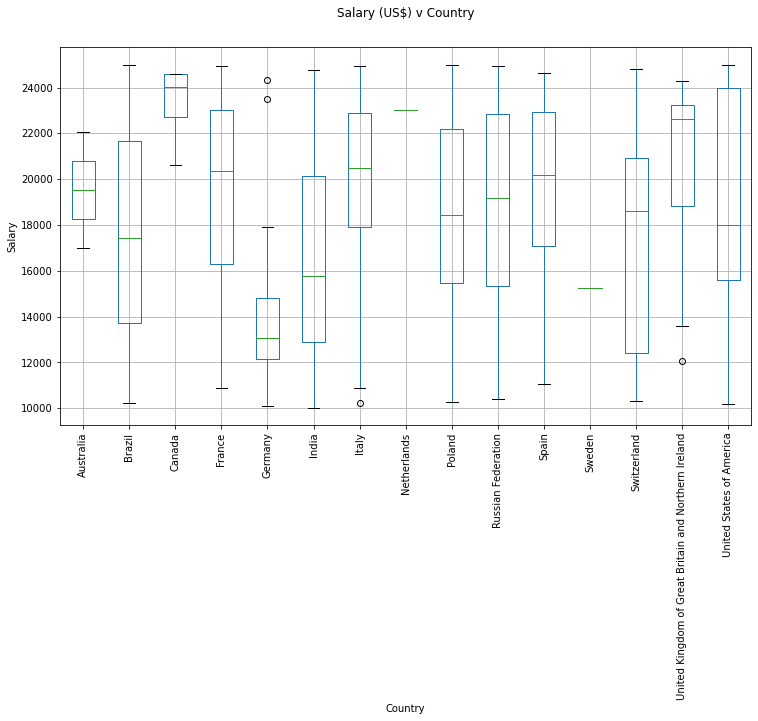

In [64]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [65]:
df.YearsCodePro.unique()

array(['20', '12', '1', 'Less than 1 year', '34', '3', '6', '2', '5',
       '17', '10', '8', '7', '4', '15', '9', '30', '19', '14', '11', '13',
       '18', '16', '25', '27', '22', '31', '23', '36', '32'], dtype=object)

In [66]:
def clean_years(x):
    if x == 'Less than 1 year':
        return float(0.5)
    else:
        return float(x)

In [67]:
df["YearsCodePro"]=df.YearsCodePro.apply(clean_years)
df.YearsCodePro.unique()

array([20. , 12. ,  1. ,  0.5, 34. ,  3. ,  6. ,  2. ,  5. , 17. , 10. ,
        8. ,  7. ,  4. , 15. ,  9. , 30. , 19. , 14. , 11. , 13. , 18. ,
       16. , 25. , 27. , 22. , 31. , 23. , 36. , 32. ])

In [68]:
df.EdLevel.unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Professional degree (JD, MD, etc.)',
       'Associate degree (A.A., A.S., etc.)', 'Something else',
       'Primary/elementary school',
       'Other doctoral degree (Ph.D., Ed.D., etc.)'], dtype=object)

In [69]:
def clean_education(x):
    if 'Master’s degree' in x:
        return 'Master’s degree'
    elif 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    elif 'Professional degree' in x or 'Other doctoral degree' in x:
        return 'Post Grad'
    else:
        return 'Less than a Bachelor’s'

In [70]:
df["EdLevel"]=df.EdLevel.apply(clean_education)
df.EdLevel.unique()

array(['Master’s degree', 'Less than a Bachelor’s', 'Bachelor’s degree',
       'Post Grad'], dtype=object)

In [71]:
df.head()

,Country,EdLevel,YearsCodePro,Salary
66,Brazil,Master’s degree,20.0,24924.0
123,Italy,Less than a Bachelor’s,12.0,21120.0
151,India,Bachelor’s degree,12.0,15480.0
378,Italy,Less than a Bachelor’s,1.0,14460.0
446,Spain,Less than a Bachelor’s,0.5,21329.0


In [72]:
df["Country"].value_counts()

India                                                   589
Brazil                                                  387
Italy                                                   110
Spain                                                   101
Poland                                                  100
Russian Federation                                       92
France                                                   54
Germany                                                  35
United Kingdom of Great Britain and Northern Ireland     25
United States of America                                 13
Switzerland                                              10
Canada                                                    4
Australia                                                 2
Sweden                                                    1
Netherlands                                               1
Name: Country, dtype: int64

In [73]:
df["EdLevel"].value_counts()

Bachelor’s degree         783
Less than a Bachelor’s    394
Master’s degree           278
Post Grad                  69
Name: EdLevel, dtype: int64

In [74]:
from sklearn.preprocessing import LabelEncoder
le_country=LabelEncoder()
df["Country"] = le_country.fit_transform(df.Country)
df.Country.unique()

array([ 1,  6,  5, 10,  4,  8,  3,  9,  0, 12, 13,  2, 14, 11,  7])

In [75]:
le_education=LabelEncoder()
df["EdLevel"]=le_education.fit_transform(df.EdLevel)
df.EdLevel.unique()

array([2, 1, 0, 3])

In [76]:
df.head()

,Country,EdLevel,YearsCodePro,Salary
66,1,2,20.0,24924.0
123,6,1,12.0,21120.0
151,5,0,12.0,15480.0
378,6,1,1.0,14460.0
446,10,1,0.5,21329.0


In [77]:
X = df.drop("Salary", axis=1)
y=df["Salary"]

In [78]:
print("X: \n", X)
print("y: \n", y)

X: 
        Country  EdLevel  YearsCodePro
66           1        2          20.0
123          6        1          12.0
151          5        0          12.0
378          6        1           1.0
446         10        1           0.5
...        ...      ...           ...
72790        5        0          12.0
72831        1        0          15.0
72920        5        1           6.0
73016        3        1           3.0
73097        1        0           3.0

[1524 rows x 3 columns]
y: 
 66       24924.0
123      21120.0
151      15480.0
378      14460.0
446      21329.0
          ...   
72790    21925.0
72831    19944.0
72920    12897.0
73016    20040.0
73097    16203.0
Name: Salary, Length: 1524, dtype: float64


In [79]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X,y)

LinearRegression()

In [80]:
y_pred=lr.predict(X)

In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
error=np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$4,337.23


In [82]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=0)
tree.fit(X,y)

DecisionTreeRegressor(random_state=0)

In [83]:
y_pred = tree.predict(X)

In [84]:
error=np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$3,546.62


In [85]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=0)
rf.fit(X,y)

RandomForestRegressor(random_state=0)

In [86]:
y_pred = rf.predict(X)

In [87]:
error=np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$3,588.32


In [88]:
from sklearn.model_selection import GridSearchCV
parameters={"max_depth": [None, 2, 4, 6, 8, 10, 12]}

regressor = RandomForestRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring="neg_mean_squared_error")
gs.fit(X,y.values)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [89]:
gs.best_estimator_

RandomForestRegressor(max_depth=6, random_state=0)

In [90]:
regressor=gs.best_estimator_

regressor.fit(X,y.values)

RandomForestRegressor(max_depth=6, random_state=0)

In [91]:
y_pred=regressor.predict(X)

error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$3,830.20


### Testing for user inputs

In [92]:
X = np.array([["United States of America", 'Master’s degree', 15 ]])
X

array([['United States of America', 'Master’s degree', '15']],
      dtype='<U24')

In [93]:
X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_education.transform(X[:,1])
X = X.astype(float)
X

array([[14.,  2., 15.]])

In [94]:
y_pred=regressor.predict(X)
y_pred

/Users/lirajkhanna/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([14389.79327124])

## save the created model using pickle

In [99]:
import pickle

In [100]:
data = {"model": regressor, "le_country": le_country, "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [101]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [102]:
y_pred=regressor_loaded.predict(X)
y_pred

/Users/lirajkhanna/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([14389.79327124])

In [103]:
le_education.classes_

array(['Bachelor’s degree', 'Less than a Bachelor’s', 'Master’s degree',
       'Post Grad'], dtype=object)